In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator #Creating some augumentation on the flight.Creates more images with some tilts, cropping, brightness, and all.
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

In [11]:
INIT_LR = 1e-3  # =0.0001
EPOCHS = 20
BS = 100

In [15]:
print("[INFO] loading images...")
imagePaths = list(paths.list_images("/content/drive/MyDrive/dataset"))
data = []
labels = []

for imagePath in imagePaths:
	label = imagePath.split(os.path.sep)[-2]
	image = cv2.imread(imagePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))

	data.append(image)
	labels.append(label)

data = np.array(data) / 255.0
labels = np.array(labels)

[INFO] loading images...


In [16]:

lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

trainAug = ImageDataGenerator(rotation_range=10,
                                  width_shift_range=0.1,
                                  height_shift_range=0.1,
                                  shear_range=0.1,
                                  brightness_range=(0.3, 1.0),
                                  horizontal_flip=False,
                                  vertical_flip=True,
                                  fill_mode='nearest')

In [22]:

baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))


headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(2, 2))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="sigmoid")(headModel)


model = Model(inputs=baseModel.input, outputs=headModel)

for layer in baseModel.layers:
	layer.trainable = False


print("[INFO] compiling model...")
opt = Adam()
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

print("[INFO] training head...")
H = model.fit(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.weights.h5")
print("Saved model to disk")

[INFO] compiling model...
[INFO] training head...
Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 734ms/step - accuracy: 0.4685 - loss: 0.7418 - val_accuracy: 0.5154 - val_loss: 0.6945
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5294 - loss: 0.7002
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 466ms/step - accuracy: 0.5212 - loss: 0.6985 - val_accuracy: 0.5923 - val_loss: 0.6884
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6100 - loss: 0.6837 
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 468ms/step - accuracy: 0.5201 - loss: 0.6945 - val_accuracy: 0.5462 - val_loss: 0.6911
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4600 - loss: 0.7036  
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 8s 478ms/step - accuracy: 0.5462 - loss: 0.6901 - val_accuracy: 0.5538 - val_loss: 0.6890
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4100 - loss: 0.6995  
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 476ms/step - accuracy: 0.4614 - loss: 0.6973 - val_accuracy: 0.5923 - v

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


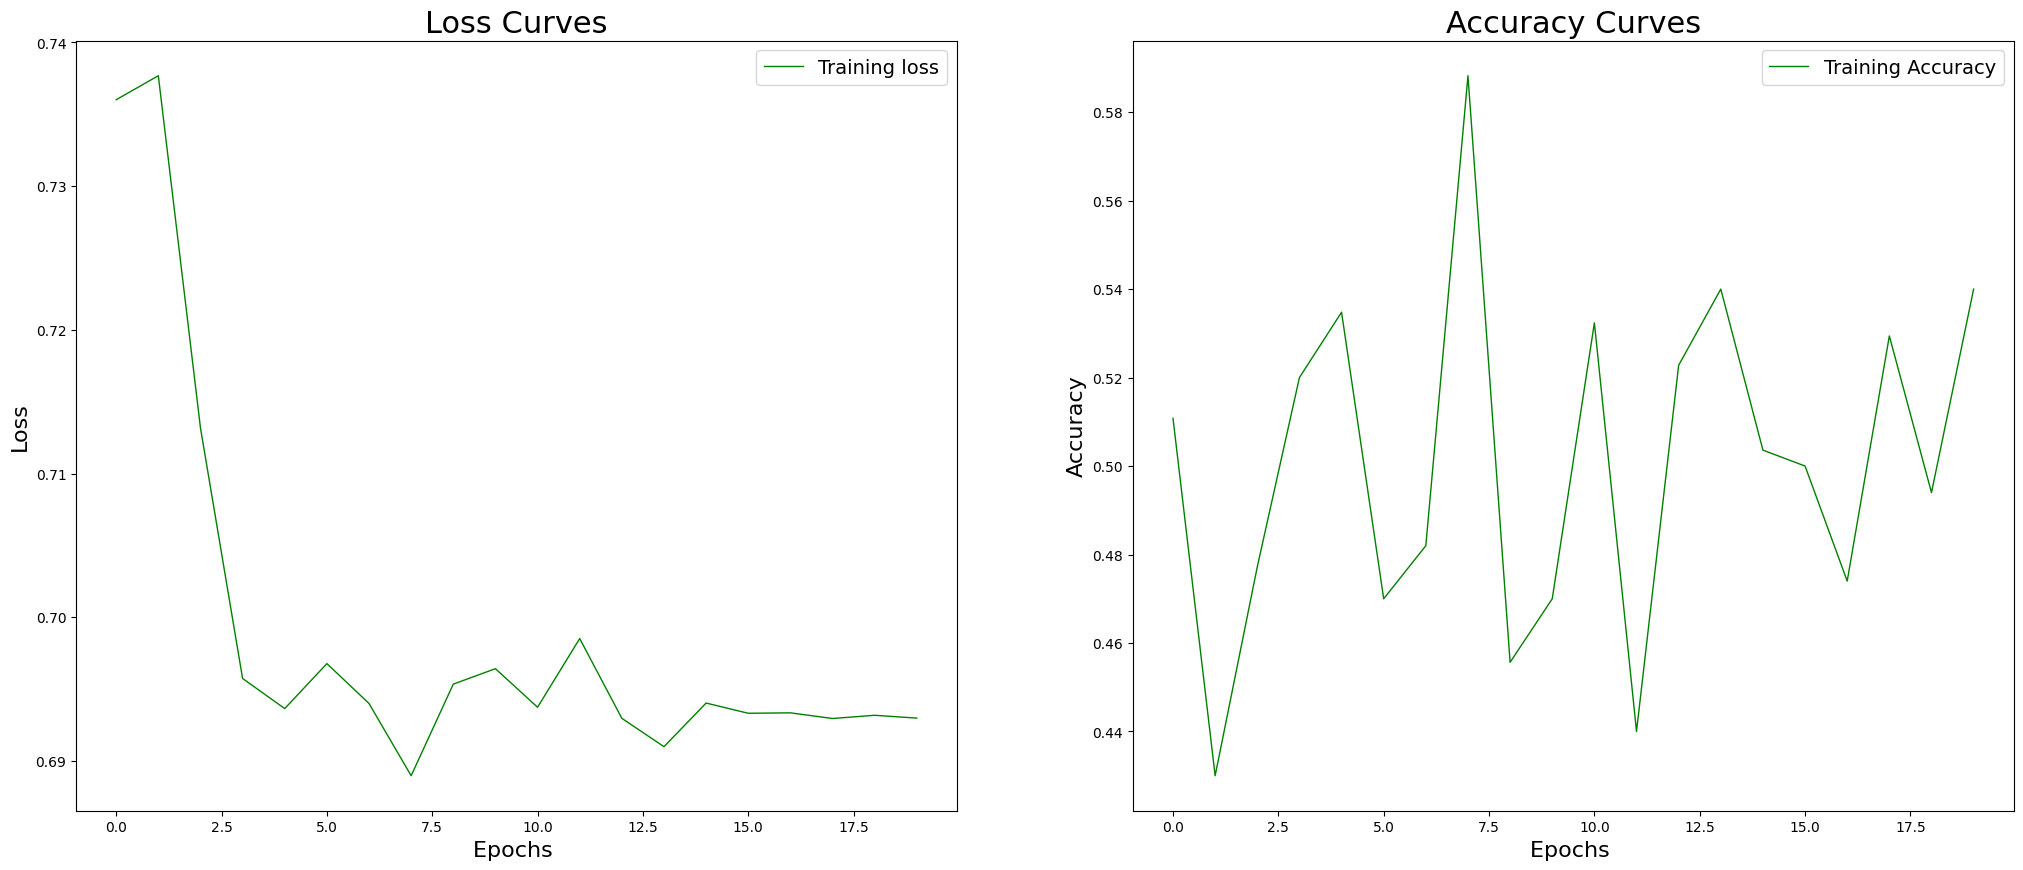

In [21]:
print(H.history.keys())

# Loss Curves
plt.figure(figsize=(25, 10))
plt.subplot(1, 2, 1)
plt.plot(H.history['loss'],'-g',linewidth=1.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=14)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=22)

# Accuracy Curves
plt.subplot(1, 2, 2)
plt.plot(H.history['accuracy'],'-g',linewidth=1.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=14)
plt.xlabel('Epochs ',fontsize=16)

plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=22)
plt.show()

In [5]:
!mv path_to_your_file ./Deep_Learning/



mv: cannot stat 'path_to_your_file': No such file or directory
